# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [55]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [38]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

# Importing data

In [39]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [40]:
print(dataset.shape)
print(dataset.head())
print(dataset.describe())
print(dataset.columns)

(150, 5)
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width       Flower
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Index(['Sepal_Length', 'Sepal_Width',

2. Drop rows with any missing values


In [41]:
# In this case we don't have any rows with missing values

3. Encoding the class label categorical column: from string to num


In [42]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
label_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
dataset["Flower"] = dataset["Flower"].map(label_mapping)

#Visualize the dataset
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [43]:
# If necesary, drop out non necesary columns
# Se asumira que todas las columnas son utiles
print(dataset.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Flower
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


5. Scatter plot of the data

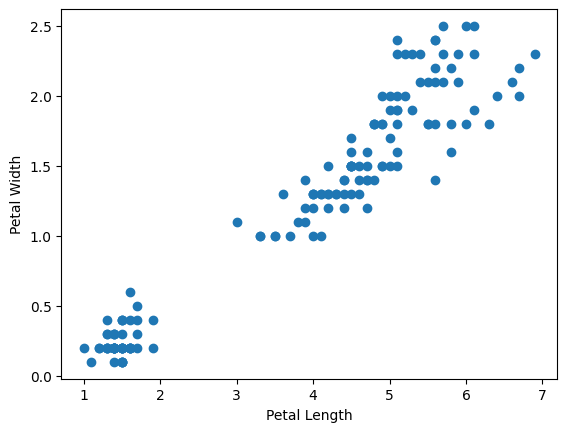

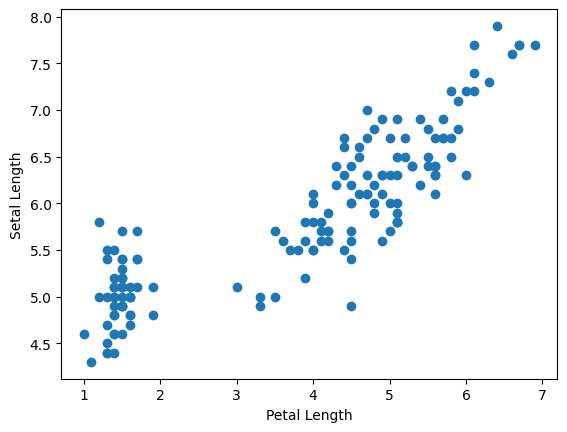

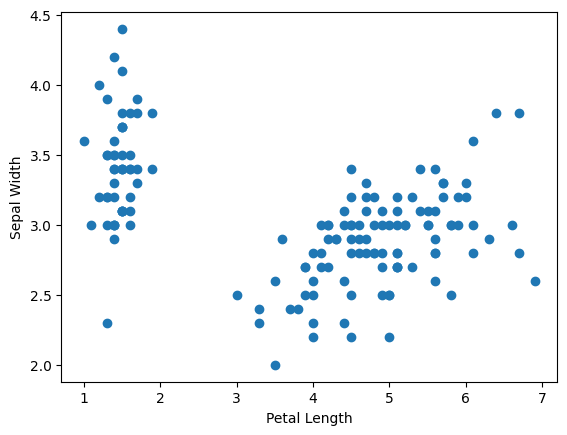

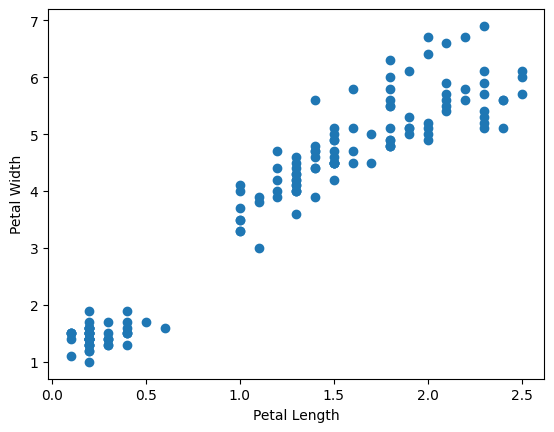

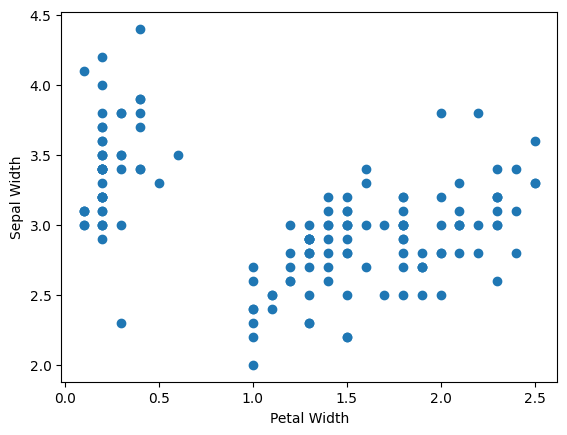

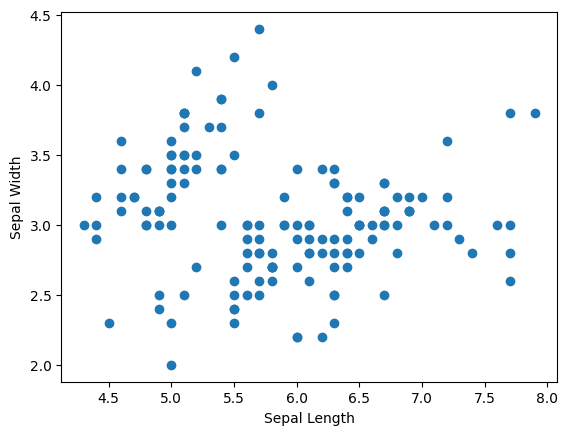

In [73]:
# prompt: Scatter plot of the data
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Setal Length')
plt.show()

# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()

# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset.Petal_Width,dataset.Petal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()

# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

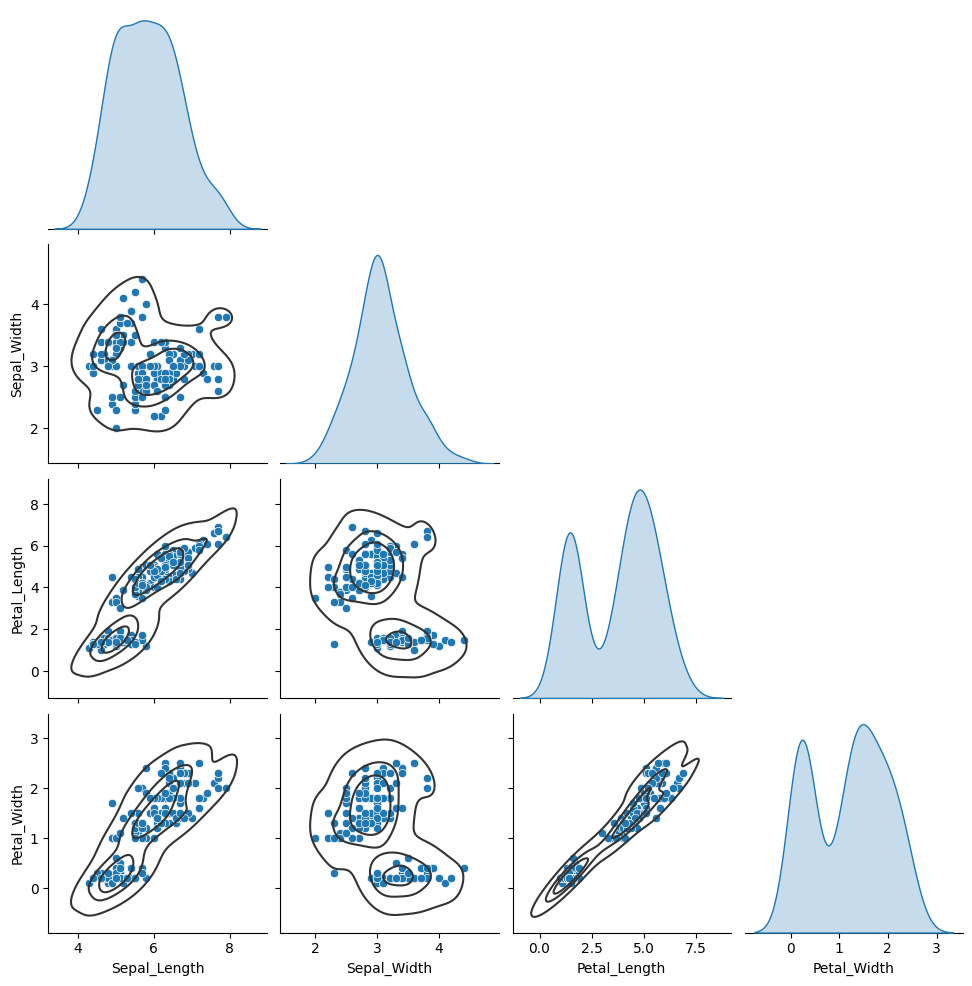

In [44]:
# Pairplot: Scatterplot of all variables
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [45]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]


Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [46]:
# Import sklearn KMeans
import sklearn.cluster as cluster
# Define number of clusters
num_cluster = 3
# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = cluster.KMeans(n_clusters=num_cluster).fit(dataset.iloc[:,0:4])
# Print estimated cluster of each point in the dataset
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [47]:
# Manual pairing the labels of the real and estimated clusters
cluester_labels = kmeans.labels_

In [48]:
# Add a new column to the dataset with the cluster informatio
dataset["Cluster"] = cluester_labels

In [49]:
# Label of the estimated clusters
dataset["Cluster"].unique()

array([1, 0, 2], dtype=int32)

In [50]:
# Cluster centroides
print(kmeans.cluster_centers_)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [51]:
# Sum of squared error (sse) of the final model
print(kmeans.inertia_)

78.94084142614601


In [52]:
# The number of iterations required to converge
print(kmeans.n_iter_)

3


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

In [56]:
X, real_labels = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
kmeans = KMeans(n_clusters=num_cluster, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

## Plot both real and estimated clusters to check for errors

In [62]:
estimated_labels = kmeans.labels_
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

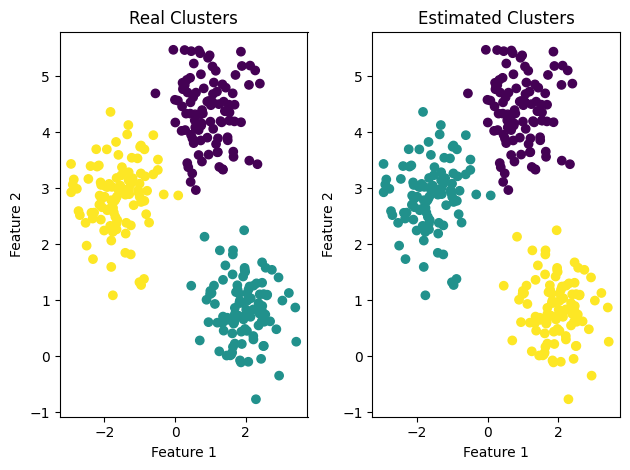

In [63]:
# Graficar los clústeres reales
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=real_labels, cmap='viridis', marker='o')
plt.title('Real Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Graficar los clústeres estimados
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=estimated_labels, cmap='viridis', marker='o')
plt.title('Estimated Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [65]:
# Intialize a list to hold sum of squared error (sse)
sse = []
# Define values of k
k_values = range(1, 11)
# For each k
for k in k_values:
    # Initialize kmeans with k clusters
    kmeans = KMeans(n_clusters=k)
    # Fit the model to the data
    kmeans.fit(dataset.iloc[:,0:4])
    # Append the sum of squared errors to the list
    sse.append(kmeans.inertia_)

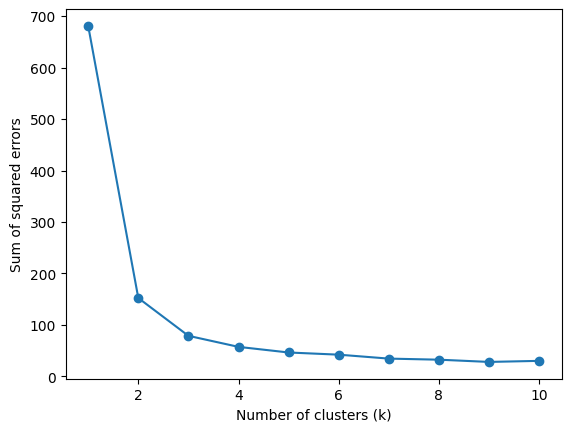

In [66]:
# Plot sse versus k
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors')
plt.show()

Choose the k after which the sse is minimally reduced


In [68]:
sse_differences = np.diff(sse)

In [69]:
optimal_k = k_values[np.argmax(sse_differences) + 1]

In [70]:
print(f"The optimal number of clusters (k) is: {optimal_k}")

The optimal number of clusters (k) is: 10


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

In [72]:
# Get the cluster labels and counts for each cluster
cluster_counts = dataset['Cluster'].value_counts().sort_index()

# Create a dictionary to store the cluster members
cluster_members = {}
for cluster_label in dataset['Cluster'].unique():
  cluster_members[cluster_label] = dataset[dataset['Cluster'] == cluster_label].index.tolist()

# Print the cluster members with their assigned numbers and random order
for cluster_label, members in cluster_members.items():
  print(f"Cluster {cluster_label}:")
  import random
  random.shuffle(members)
members

Cluster 1:
Cluster 0:
Cluster 2:


[111,
 104,
 128,
 148,
 103,
 109,
 136,
 144,
 132,
 112,
 116,
 108,
 141,
 147,
 52,
 124,
 102,
 135,
 117,
 131,
 120,
 129,
 115,
 140,
 107,
 118,
 110,
 122,
 130,
 143,
 77,
 137,
 100,
 125,
 145,
 139,
 134,
 105]